In [1]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [10, 5]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

# reveal a hint only while holding the mouse down
from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

# hide FutureWarnings, which may show for Seaborn calls in most recent Anaconda
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
df_enron = pd.read_csv('enron-v1.csv')

In [3]:
df_enron[df_enron['fromId'] == 92]

,date,fromId,fromEmail,fromJobtitle,toId,toEmail,toJobtitle,messageType,sentiment
15415,2001-10-08,92,mary.fischer@enron.com,Employee,92,mary.fischer@enron.com,Employee,TO,0.0


In [4]:
groupedid = df_enron.groupby(['fromJobtitle'], as_index=False).sum()
groupedid

,fromJobtitle,fromId,toId,sentiment
0,CEO,29713,49924,7.762076
1,Director,21640,55010,4.679885
2,Employee,579859,750378,42.489546
3,In House Lawyer,2183,4820,1.383562
4,Manager,332862,302260,34.980534
5,Managing Director,30014,24238,2.212689
6,President,36204,68424,6.433309
7,Trader,70941,68934,-0.726748
8,Unknown,813483,621066,34.157895
9,Vice President,498308,525541,51.527758


In [5]:
grouped1 = df_enron.groupby(['fromEmail'], as_index=False)
grouped1.sum()

,fromEmail,fromId,toId,sentiment
0,albert.meyers@enron.com,225,330,0.013699
1,andrea.ring@enron.com,1748,4262,0.196107
2,andy.zipper@enron.com,5040,5035,0.734679
3,barry.tycholiz@enron.com,9408,13341,1.385004
4,benjamin.rogers@enron.com,1200,1784,0.493151
...,...,...,...,...
142,thomas.a.martin@enron.com,5616,2720,0.098053
143,tom.donohoe@enron.com,870,208,-0.059841
144,tori.kuykendall@enron.com,9636,5522,0.060562
145,tracy.geaccone@enron.com,22785,15709,1.031723


In [6]:
df_enron_dated = df_enron.sort_values(by='date')
df_enron_dated 

,date,fromId,fromEmail,fromJobtitle,toId,toEmail,toJobtitle,messageType,sentiment
16734,1998-11-12,2,mark.e.taylor@enron.com,Employee,141,tana.jones@enron.com,Unknown,TO,0.013699
17383,1998-11-18,2,mark.e.taylor@enron.com,Employee,97,michelle.cash@enron.com,Employee,CC,0.000000
26725,1998-11-18,2,mark.e.taylor@enron.com,Employee,97,michelle.cash@enron.com,Employee,TO,-0.052632
23347,1998-11-23,2,mark.e.taylor@enron.com,Employee,1,marie.heard@enron.com,Unknown,TO,0.041096
23337,1998-11-23,2,mark.e.taylor@enron.com,Employee,141,tana.jones@enron.com,Unknown,CC,0.041096
...,...,...,...,...,...,...,...,...,...
22290,2002-06-18,57,chris.germany@enron.com,Employee,57,chris.germany@enron.com,Employee,TO,0.000000
19231,2002-06-20,133,stephanie.panus@enron.com,Employee,57,chris.germany@enron.com,Employee,TO,0.013699
19232,2002-06-20,133,stephanie.panus@enron.com,Employee,140,susan.bailey@enron.com,Unknown,TO,0.013699
19233,2002-06-20,133,stephanie.panus@enron.com,Employee,125,sara.shackleton@enron.com,Unknown,TO,0.013699


In [7]:
unknown_send = df_enron['fromJobtitle'] == 'Unknown'
trader_send = df_enron['fromJobtitle'] == 'Trader'
lawyer_send = df_enron['fromJobtitle'] == 'In House Lawyer'
employee_send = df_enron['fromJobtitle'] == 'Employee'
manager_send = df_enron['fromJobtitle'] == 'Manager'
director_send = df_enron['fromJobtitle'] == 'Director'
managing_director_send = df_enron['fromJobtitle'] == 'Managing Director'
vice_president_send = df_enron['fromJobtitle'] == 'Vice President'
president_send = df_enron['fromJobtitle'] == 'President'
CEO_send = df_enron['fromJobtitle'] == 'CEO'

df_unknown_send = df_enron[unknown_send]
df_trader_send = df_enron[trader_send]
df_lawyer_send = df_enron[lawyer_send]
df_employee_send = df_enron[employee_send]
df_manager_send = df_enron[manager_send]
df_director_send = df_enron[director_send]
df_managing_director_send = df_enron[managing_director_send]
df_vice_president_send = df_enron[vice_president_send]
df_president_send = df_enron[president_send]
df_CEO_send = df_enron[CEO_send]

In [8]:
unknown_received = df_enron['toJobtitle'] == 'Unknown'
trader_received = df_enron['toJobtitle'] == 'Trader'
lawyer_received = df_enron['toJobtitle'] == 'In House Lawyer'
employee_received = df_enron['toJobtitle'] == 'Employee'
manager_received = df_enron['toJobtitle'] == 'Manager'
director_received = df_enron['toJobtitle'] == 'Director'
managing_director_received = df_enron['toJobtitle'] == 'Managing Director'
vice_president_received = df_enron['toJobtitle'] == 'Vice President'
president_received = df_enron['toJobtitle'] == 'President'
CEO_received = df_enron['toJobtitle'] == 'CEO'

df_unknown_received = df_enron[unknown_received]
df_trader_received = df_enron[trader_received]
df_lawyer_received = df_enron[lawyer_received]
df_employee_received = df_enron[employee_received]
df_manager_received = df_enron[manager_received]
df_director_received = df_enron[director_received]
df_managing_director_received = df_enron[managing_director_received]
df_vice_president_received = df_enron[vice_president_received]
df_president_received = df_enron[president_received]
df_CEO_received = df_enron[CEO_received]

In [9]:
df_jobs = pd.DataFrame({'Jobs': ['Unknown', 'Trader', 'In House Lawyer', 'Employee', 'Manager', 'Director', 'Managing Director', 'Vice President', 'President', 'CEO'], 'Send': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Avg Sentiment Send': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Min Sentiment Send': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Max Sentiment Send': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Received': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Avg Sentiment Received': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Min Sentiment Received': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Max Sentiment Received': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})
df_jobs.loc[0, 'Send'] = df_unknown_send['date'].count()
df_jobs.loc[1, 'Send'] = df_trader_send['date'].count()
df_jobs.loc[2, 'Send'] = df_lawyer_send['date'].count()
df_jobs.loc[3, 'Send'] = df_employee_send['date'].count()
df_jobs.loc[4, 'Send'] = df_manager_send['date'].count()
df_jobs.loc[5, 'Send'] = df_director_send['date'].count()
df_jobs.loc[6, 'Send'] = df_managing_director_send['date'].count()
df_jobs.loc[7, 'Send'] = df_vice_president_send['date'].count()
df_jobs.loc[8, 'Send'] = df_president_send['date'].count()
df_jobs.loc[9, 'Send'] = df_CEO_send['date'].count()

df_jobs.loc[0, 'Avg Sentiment Send'] = df_unknown_send['sentiment'].mean()
df_jobs.loc[1, 'Avg Sentiment Send'] = df_trader_send['sentiment'].mean()
df_jobs.loc[2, 'Avg Sentiment Send'] = df_lawyer_send['sentiment'].mean()
df_jobs.loc[3, 'Avg Sentiment Send'] = df_employee_send['sentiment'].mean()
df_jobs.loc[4, 'Avg Sentiment Send'] = df_manager_send['sentiment'].mean()
df_jobs.loc[5, 'Avg Sentiment Send'] = df_director_send['sentiment'].mean()
df_jobs.loc[6, 'Avg Sentiment Send'] = df_managing_director_send['sentiment'].mean()
df_jobs.loc[7, 'Avg Sentiment Send'] = df_vice_president_send['sentiment'].mean()
df_jobs.loc[8, 'Avg Sentiment Send'] = df_president_send['sentiment'].mean()
df_jobs.loc[9, 'Avg Sentiment Send'] = df_CEO_send['sentiment'].mean()

df_jobs.loc[0, 'Min Sentiment Send'] = df_unknown_send['sentiment'].min()
df_jobs.loc[1, 'Min Sentiment Send'] = df_trader_send['sentiment'].min()
df_jobs.loc[2, 'Min Sentiment Send'] = df_lawyer_send['sentiment'].min()
df_jobs.loc[3, 'Min Sentiment Send'] = df_employee_send['sentiment'].min()
df_jobs.loc[4, 'Min Sentiment Send'] = df_manager_send['sentiment'].min()
df_jobs.loc[5, 'Min Sentiment Send'] = df_director_send['sentiment'].min()
df_jobs.loc[6, 'Min Sentiment Send'] = df_managing_director_send['sentiment'].min()
df_jobs.loc[7, 'Min Sentiment Send'] = df_vice_president_send['sentiment'].min()
df_jobs.loc[8, 'Min Sentiment Send'] = df_president_send['sentiment'].min()
df_jobs.loc[9, 'Min Sentiment Send'] = df_CEO_send['sentiment'].min()

df_jobs.loc[0, 'Max Sentiment Send'] = df_unknown_send['sentiment'].max()
df_jobs.loc[1, 'Max Sentiment Send'] = df_trader_send['sentiment'].max()
df_jobs.loc[2, 'Max Sentiment Send'] = df_lawyer_send['sentiment'].max()
df_jobs.loc[3, 'Max Sentiment Send'] = df_employee_send['sentiment'].max()
df_jobs.loc[4, 'Max Sentiment Send'] = df_manager_send['sentiment'].max()
df_jobs.loc[5, 'Max Sentiment Send'] = df_director_send['sentiment'].max()
df_jobs.loc[6, 'Max Sentiment Send'] = df_managing_director_send['sentiment'].max()
df_jobs.loc[7, 'Max Sentiment Send'] = df_vice_president_send['sentiment'].max()
df_jobs.loc[8, 'Max Sentiment Send'] = df_president_send['sentiment'].max()
df_jobs.loc[9, 'Max Sentiment Send'] = df_CEO_send['sentiment'].max()

In [10]:
df_jobs.loc[0, 'Received'] = df_unknown_received['date'].count()
df_jobs.loc[1, 'Received'] = df_trader_received['date'].count()
df_jobs.loc[2, 'Received'] = df_lawyer_received['date'].count()
df_jobs.loc[3, 'Received'] = df_employee_received['date'].count()
df_jobs.loc[4, 'Received'] = df_manager_received['date'].count()
df_jobs.loc[5, 'Received'] = df_director_received['date'].count()
df_jobs.loc[6, 'Received'] = df_managing_director_received['date'].count()
df_jobs.loc[7, 'Received'] = df_vice_president_received['date'].count()
df_jobs.loc[8, 'Received'] = df_president_received['date'].count()
df_jobs.loc[9, 'Received'] = df_CEO_received['date'].count()

df_jobs.loc[0, 'Avg Sentiment Received'] = df_unknown_received['sentiment'].mean()
df_jobs.loc[1, 'Avg Sentiment Received'] = df_trader_received['sentiment'].mean()
df_jobs.loc[2, 'Avg Sentiment Received'] = df_lawyer_received['sentiment'].mean()
df_jobs.loc[3, 'Avg Sentiment Received'] = df_employee_received['sentiment'].mean()
df_jobs.loc[4, 'Avg Sentiment Received'] = df_manager_received['sentiment'].mean()
df_jobs.loc[5, 'Avg Sentiment Received'] = df_director_received['sentiment'].mean()
df_jobs.loc[6, 'Avg Sentiment Received'] = df_managing_director_received['sentiment'].mean()
df_jobs.loc[7, 'Avg Sentiment Received'] = df_vice_president_received['sentiment'].mean()
df_jobs.loc[8, 'Avg Sentiment Received'] = df_president_received['sentiment'].mean()
df_jobs.loc[9, 'Avg Sentiment Received'] = df_CEO_received['sentiment'].mean()

df_jobs.loc[0, 'Min Sentiment Received'] = df_unknown_received['sentiment'].min()
df_jobs.loc[1, 'Min Sentiment Received'] = df_trader_received['sentiment'].min()
df_jobs.loc[2, 'Min Sentiment Received'] = df_lawyer_received['sentiment'].min()
df_jobs.loc[3, 'Min Sentiment Received'] = df_employee_received['sentiment'].min()
df_jobs.loc[4, 'Min Sentiment Received'] = df_manager_received['sentiment'].min()
df_jobs.loc[5, 'Min Sentiment Received'] = df_director_received['sentiment'].min()
df_jobs.loc[6, 'Min Sentiment Received'] = df_managing_director_received['sentiment'].min()
df_jobs.loc[7, 'Min Sentiment Received'] = df_vice_president_received['sentiment'].min()
df_jobs.loc[8, 'Min Sentiment Received'] = df_president_received['sentiment'].min()
df_jobs.loc[9, 'Min Sentiment Received'] = df_CEO_received['sentiment'].min()

df_jobs.loc[0, 'Max Sentiment Received'] = df_unknown_received['sentiment'].max()
df_jobs.loc[1, 'Max Sentiment Received'] = df_trader_received['sentiment'].max()
df_jobs.loc[2, 'Max Sentiment Received'] = df_lawyer_received['sentiment'].max()
df_jobs.loc[3, 'Max Sentiment Received'] = df_employee_received['sentiment'].max()
df_jobs.loc[4, 'Max Sentiment Received'] = df_manager_received['sentiment'].max()
df_jobs.loc[5, 'Max Sentiment Received'] = df_director_received['sentiment'].max()
df_jobs.loc[6, 'Max Sentiment Received'] = df_managing_director_received['sentiment'].max()
df_jobs.loc[7, 'Max Sentiment Received'] = df_vice_president_received['sentiment'].max()
df_jobs.loc[8, 'Max Sentiment Received'] = df_president_received['sentiment'].max()
df_jobs.loc[9, 'Max Sentiment Received'] = df_CEO_received['sentiment'].max()

df_jobs

,Jobs,Send,Avg Sentiment Send,Min Sentiment Send,Max Sentiment Send,Received,Avg Sentiment Received,Min Sentiment Received,Max Sentiment Received
0,Unknown,8183,0.004174,-0.473684,0.931507,6830,0.005015,-0.368421,1.000000
1,Trader,896,-0.000811,-0.368421,0.178082,1268,0.002724,-1.000000,0.164384
2,In House Lawyer,59,0.023450,0.000000,0.109589,84,0.007493,-0.105263,0.095890
3,Employee,9404,0.004518,-1.000000,1.000000,7732,0.004845,-1.000000,0.547945
4,Manager,3301,0.010597,-0.736842,0.315068,2494,0.012065,-0.736842,0.232877
5,Director,839,0.005578,-0.157895,0.164384,1903,0.006698,-0.315789,0.917808
6,Managing Director,356,0.006215,-0.105263,0.095890,446,0.007145,-0.157895,0.246575
7,Vice President,6295,0.008186,-0.684211,0.917808,8545,0.006179,-0.631579,0.520548
8,President,989,0.006505,-0.210526,0.232877,1269,0.006018,-0.736842,0.315068
9,CEO,719,0.010796,-0.157895,0.246575,470,0.005631,-0.736842,0.342466


In [11]:
df_most = df_enron.groupby('fromId').count()
df_enron.groupby('fromId').count().max()
most = df_most['date'] == 2845
most_emails_send = df_enron['fromId'] == 42
df_enron[most_emails_send]

Award_most_send = 'jeff.dasovich@enron.com, id 42, 2845 emails send'


df_most2 = df_enron.groupby('toId').count()
df_enron.groupby('toId').count().max()
most2 = df_most2['date'] == 1290
most_emails_received = df_enron['toId'] == 116
df_enron[most_emails_received]

Award_most_received = 'richard.shapiro@enron.com, id 116, 1290 emails received'


extreme_positive_mail = df_enron['sentiment'] == 1
extreme_negative_mail = df_enron['sentiment'] == -1

df_most_positive = df_enron[extreme_positive_mail]    #CONTAINS MOST POSITIVE EMAIL
df_most_negative = df_enron[extreme_negative_mail]    #CONTAINS THE 3 MOST NEGATIVE EMAILS
#OBSERVATION:3 most negative mails send are all send by the same person (I..gay@elron.com, id 113)

positive_mail = df_enron['sentiment'] > 0
negative_mail = df_enron['sentiment'] < 0

df_positive_mail = df_enron[positive_mail]
df_negative_mail = df_enron[negative_mail]


df_positive_send = df_positive_mail.groupby('fromId').count()
df_positive_mail.groupby('fromId').count().max()
most_positive = df_positive_send['date'] == 1315
most_positive_send = df_enron['fromId'] == 42
df_enron[most_positive_send]

Award_most_positive_send = 'jeff.dasovich@enron.com, id 42, 1315 positive emails send'


df_negative_send = df_negative_mail.groupby('fromId').count()
df_negative_mail.groupby('fromId').count().max()
most_negative = df_negative_send['date'] == 388
df_negative_send[most_negative]

Award_most_negative_send = 'jeff.dasovich@enron.com, id 42, 388 negative emails send'

no_cc = df_positive_mail['messageType'] == 'TO'
no_cc2 = df_negative_mail['messageType'] == 'TO'

df_positive_received = df_positive_mail[no_cc].groupby('toId').count()
df_positive_mail[no_cc].groupby('toId').count().max()
most_positive2 = df_positive_received['date'] == 414
df_positive_received[most_positive2]
most_positive_received = df_enron['toId'] == 116
df_enron[most_positive_received]

Award_most_positive_received = 'richard.shapiro@enron.com, id 116, 414 positive emails received'
#Award_most_positive_received = 'j.kaminski@enron.com, id 148, 615 positive emails received'
#OBSERVATION: j.kaminski send a lot of emails to himself as cc, those were the positive onces.

df_negative_received = df_negative_mail[no_cc2].groupby('toId').count()
df_negative_mail[no_cc2].groupby('toId').count().max()
most_negative2 = df_negative_received['date'] == 124
df_negative_received[most_negative2]
most_negative_received = df_enron['toId'] == 36
df_enron[most_negative_received]

Award_most_negative_received = 'james.d.steffes@enron.com, id 36, 124 negative emails received'


Award_most_send, Award_most_received, Award_most_positive_send, Award_most_negative_send, Award_most_positive_received, Award_most_negative_received

('jeff.dasovich@enron.com, id 42, 2845 emails send',
 'richard.shapiro@enron.com, id 116, 1290 emails received',
 'jeff.dasovich@enron.com, id 42, 1315 positive emails send',
 'jeff.dasovich@enron.com, id 42, 388 negative emails send',
 'richard.shapiro@enron.com, id 116, 414 positive emails received',
 'james.d.steffes@enron.com, id 36, 124 negative emails received')

<AxesSubplot:xlabel='fromId', ylabel='toId'>

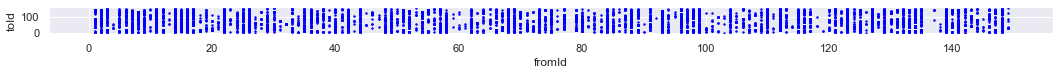

In [12]:
df_enron.plot(kind='scatter', x='fromId', y='toId', c='blue', s=2, alpha=1, figsize=(18, 0.5))
#Email senders
#Observation, id +- 136 does not seem to be sending emails

<AxesSubplot:xlabel='toId', ylabel='fromId'>

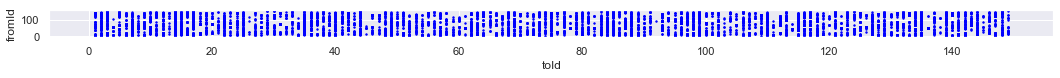

In [13]:
df_enron.plot(kind='scatter', x='toId', y='fromId', c='blue', s=2, alpha=1, figsize=(18, 0.5))
#Email receivers

<AxesSubplot:xlabel='fromId', ylabel='toId'>

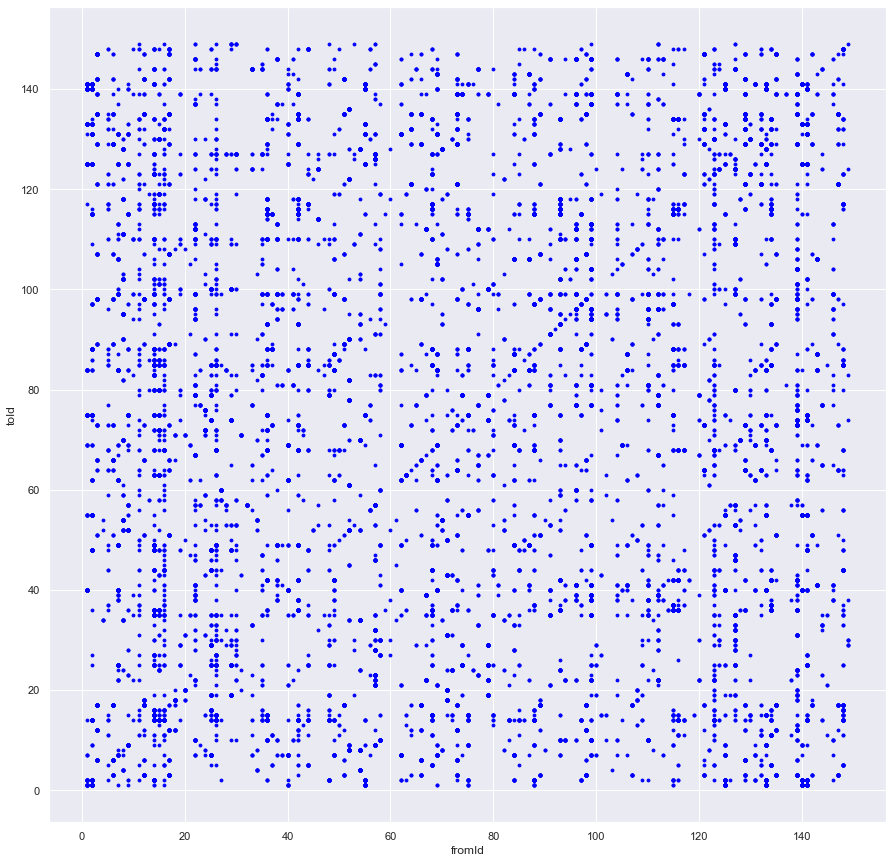

In [14]:
df_enron.plot(kind='scatter', x='fromId', y='toId', c='blue', s=8, alpha=1, figsize=(15, 15))
#OBSERVATION: A lot of people send emails/ cc's to themself

In [15]:
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import numpy as np

In [16]:
from bokeh.io import output_notebook, show, save
output_notebook()

Loading BokehJS ...

In [100]:
G = networkx.from_pandas_edgelist(df_enron, 'fromEmail', 'toEmail', edge_attr=True)

G1 = networkx.from_pandas_edgelist(df_enron, 'fromJobtitle', 'fromEmail')

G2 = networkx.from_pandas_edgelist(df_enron, 'fromJobtitle','fromJobtitle')

In [52]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

TOOLTIPS = [("email", "@index")]
plot = figure(tooltips = TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10, 10), y_range=Range1d(-10, 10), title='Email')


network_graph = from_networkx(G2, networkx.spring_layout, scale=50, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=10, fill_color='red')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [102]:

from bokeh.palettes import Reds8
from bokeh.transform import linear_cmap

degrees = dict(networkx.degree(G))
adjusted_node_size = dict([(node, (degree + 5) - ((degree + 5)*0.3) ) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='degree', values=degrees)
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Reds8

networkx.set_node_attributes(G, name='degree', values=degrees)

source = G2.nodes

networkx.set_node_attributes(G, name = 'job', values = source)

TOOLTIPS = [
       ("Email address", "@index"),
        ("sent email address", "@degree"),
        ("Jobtitle","@job"),
]

plot = figure(tooltips = TOOLTIPS,
              tools="pan,zoom_in,wheel_zoom,save,reset,box_select,undo", active_scroll='wheel_zoom',
            x_range=Range1d(-20,20), y_range=Range1d(-20,20),  title='Email')

N_graph = from_networkx(G, networkx.spring_layout, scale=100)

minimum_value_color = min(N_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(N_graph.node_renderer.data_source.data[color_by_this_attribute])
N_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, maximum_value_color,minimum_value_color))


N_graph.edge_renderer.glyph = MultiLine(line_alpha=10, line_width=1)

plot.renderers.append(N_graph)

show(plot)

In [57]:
source

NodeView(('Employee', 'Vice President', 'Unknown', 'Manager', 'CEO', 'Trader', 'Director', 'President', 'Managing Director', 'In House Lawyer'))

In [21]:
df2 = df_enron[df_enron['fromJobtitle'] == 'Vice President']
df3 = df2.drop_duplicates(subset='fromEmail')
df3

,date,fromId,fromEmail,fromJobtitle,toId,toEmail,toJobtitle,messageType,sentiment
2,2001-11-22,64,danny.mccarty@enron.com,Vice President,121,rod.hayslett@enron.com,Vice President,TO,0.000000
4,2000-10-11,48,andy.zipper@enron.com,Vice President,2,mark.e.taylor@enron.com,Employee,TO,0.027397
13,2000-07-10,55,carol.clair@enron.com,Vice President,140,susan.bailey@enron.com,Unknown,CC,0.013699
17,2000-12-02,73,drew.fossum@enron.com,Vice President,3,lindy.donoho@enron.com,Employee,TO,0.000000
23,2000-10-23,115,richard.b.sanders@enron.com,Vice President,42,jeff.dasovich@enron.com,Employee,TO,0.000000
36,2001-09-04,116,richard.shapiro@enron.com,Vice President,134,steven.j.kean@enron.com,Vice President,TO,0.000000
72,2000-10-01,134,steven.j.kean@enron.com,Vice President,85,greg.whalley@enron.com,President,TO,0.000000
105,2002-01-15,15,kevin.m.presto@enron.com,Vice President,14,louise.kitchen@enron.com,President,TO,0.000000
106,2001-05-07,49,barry.tycholiz@enron.com,Vice President,84,gerald.nemec@enron.com,Unknown,TO,0.000000
109,2000-05-07,36,james.d.steffes@enron.com,Vice President,134,steven.j.kean@enron.com,Vice President,TO,0.000000


In [78]:
degrees = dict(networkx.degree(G1))



adjusted_node_size = dict([(node, (degree + 5) - ((degree + 5)*0.3) ) for node, degree in networkx.degree(G1)])
networkx.set_node_attributes(G1, name='degree', values=degrees)
networkx.set_node_attributes(G1, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Reds8

networkx.set_node_attributes(G1, name='degree', values=degrees)

TOOLTIPS = [
       ("Jobtitle", "@index"),
        ("Total number of email address", "@degree"),
        #("Jobtitle","@name"),
]

 

plot = figure(tooltips = TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-20,20), y_range=Range1d(-20,20),  title='Email')

N_graph = from_networkx(G1, networkx.spring_layout, scale=10)

#Source online
minimum_value_color = min(N_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(N_graph.node_renderer.data_source.data[color_by_this_attribute])
N_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, maximum_value_color,minimum_value_color))


N_graph.edge_renderer.glyph = MultiLine(line_alpha=10, line_width=1)

plot.renderers.append(N_graph)

show(plot)

In [107]:
df1 = df_enron[df_enron['fromJobtitle'] == 'Vice President']
df = df1.drop_duplicates(subset='fromEmail', keep='first')
df.count()

date            23
fromId          23
fromEmail       23
fromJobtitle    23
toId            23
toEmail         23
toJobtitle      23
messageType     23
sentiment       23
dtype: int64

In [110]:
degrees = dict(networkx.degree(G2))

adjusted_node_size = dict([(node, (degree + 5) - ((degree + 5)*0.3) ) for node, degree in networkx.degree(G2)])
networkx.set_node_attributes(G2, name='degree', values=degrees)
networkx.set_node_attributes(G2, name='adjusted_node_size', values=adjusted_node_size)

size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

color_palette = Reds8

TOOLTIPS = [
       ("Jobtitle", "@index"),
        ("number of different emails", "@degree"),
        #("Jobtitle","@job"),
]

 

plot = figure(tooltips = TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-20,20), y_range=Range1d(-20,20),  title=title)

network_graph = from_networkx(G2, networkx.spring_layout, scale=20, center=(0, 0))


##Source from online
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, maximum_value_color,minimum_value_color))


network_graph.edge_renderer.glyph = MultiLine(line_alpha=10, line_width=1)

plot.renderers.append(network_graph)

show(plot)

NameError: name 'title' is not defined

In [ ]:
df1 = df_enron[df_enron['fromJobtitle'] == 'Unknown']
df = df1.drop_duplicates(subset='fromEmail', keep='first')
df.count()

In [ ]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

#Choose a title!
title = 'Email'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("email", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10, 10), y_range=Range1d(-10, 10), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(FI, networkx.spring_layout, scale=50, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=10, fill_color='red')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [ ]:
https://melaniewalsh.github.io/Intro-Cultural-Analytics/Network-Analysis/Making-Network-Viz-with-Bokeh.html

In [ ]:
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

colors = ['#000000']+hv.Cycle('Category20').values
edges_df = df_enron['']
fb_nodes = hv.Nodes(pd.read_csv('../assets/fb_nodes.csv')).sort()
fb_graph = hv.Graph((edges_df, fb_nodes), label='Facebook Circles')

fb_graph.opts(cmap=colors, node_size=10, edge_line_width=1,
              node_line_color='gray', node_color='circle')

In [ ]:
df_enron
